**Problem** **Statement**:

Build a sentiment analysis model to analyze customer reviews ans feedback for a hospitality company. The model should be able to classify reviews as positive, negative, or neutral, and identify key topics or areas of concern.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [73]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
data = pd.read_csv("/content/tripadvisor_hotel_reviews.csv", on_bad_lines='skip')


In [7]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [8]:
data.shape

(20491, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [10]:
data['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [11]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None


In [12]:
print(data.isnull().sum())


Review    0
Rating    0
dtype: int64


In [13]:
print(data.describe())

             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


In [14]:
data['Length'] = data['Review'].str.len()
data.head(10)

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
5,love monaco staff husband stayed hotel crazy w...,5,1002
6,"cozy stay rainy city, husband spent 7 nights m...",5,748
7,"excellent staff, housekeeping quality hotel ch...",4,597
8,"hotel stayed hotel monaco cruise, rooms genero...",5,419
9,excellent stayed hotel monaco past w/e delight...,5,271


**Distribution of Ratings**:

Distribution of the ratings to see how they are spread across different values.

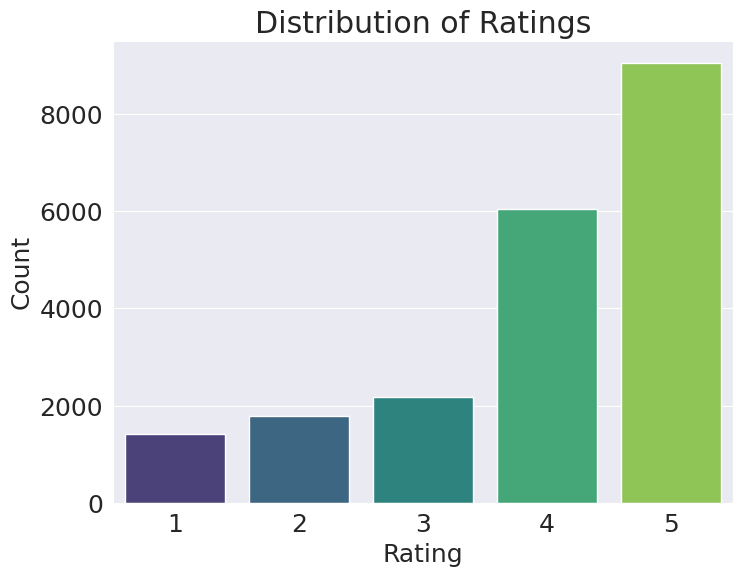

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


**Sentiment Assignment:**

Assign sentiments (positive, neutral, negative) based on the ratings. Typically, ratings 1-2 can be considered negative, 3 as neutral, and 4-5 as positive.

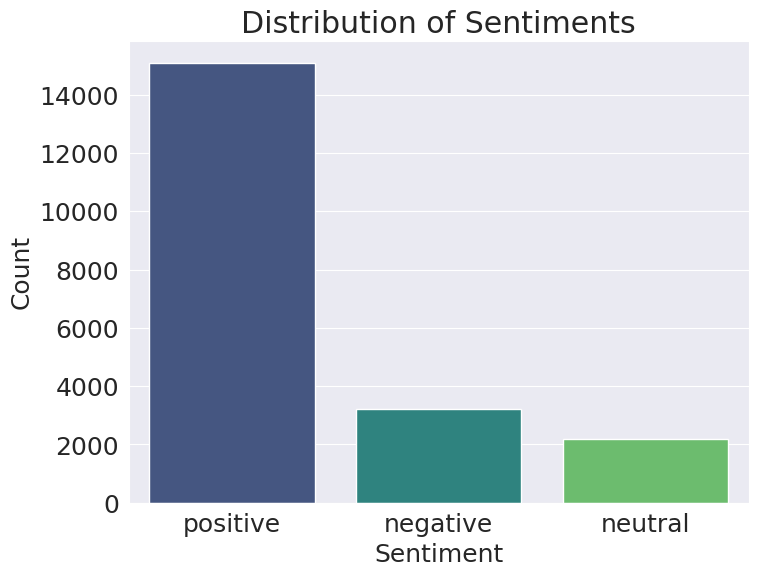

In [16]:
def assign_sentiment(rating):
    if rating in [4, 5]:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'


data['Sentiment'] = data['Rating'].apply(assign_sentiment)


plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [17]:
data.head()


,Review,Rating,Length,Sentiment
0,nice hotel expensive parking got good deal sta...,4,593,positive
1,ok nothing special charge diamond member hilto...,2,1689,negative
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral
3,"unique, great stay, wonderful time hotel monac...",5,600,positive
4,"great stay great stay, went seahawk game aweso...",5,1281,positive


In [18]:
data.head()

,Review,Rating,Length,Sentiment
0,nice hotel expensive parking got good deal sta...,4,593,positive
1,ok nothing special charge diamond member hilto...,2,1689,negative
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral
3,"unique, great stay, wonderful time hotel monac...",5,600,positive
4,"great stay great stay, went seahawk game aweso...",5,1281,positive


**Text Preprocessing:**

Clean and preprocess the review texts to prepare them for analysis.

In [19]:
import re
import string
from nltk.corpus import stopwords


import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


data['Cleaned_Review'] = data['Review'].apply(clean_text)


print(data[['Review', 'Cleaned_Review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      Cleaned_Review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms experience hotel monaco seattle goo...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


In [20]:
data.head()

,Review,Rating,Length,Sentiment,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,593,positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,1689,negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,600,positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,1281,positive,great stay great stay went seahawk game awesom...


**Word Cloud for Visualization:**

Visualize the most common words in positive, negative, and neutral reviews using word clouds.

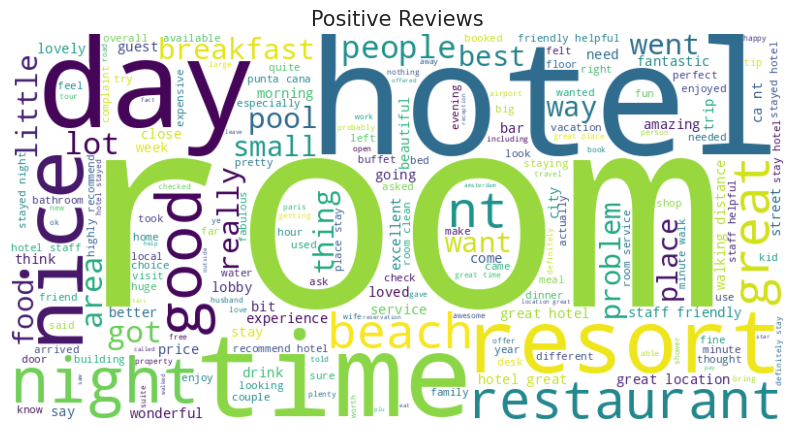

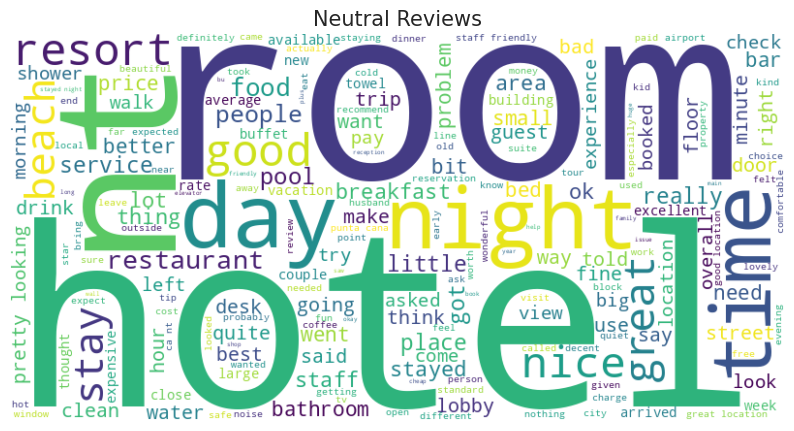

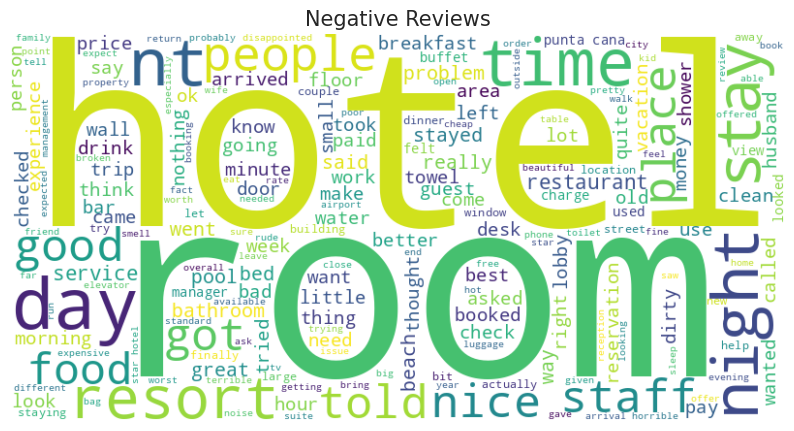

In [21]:
from wordcloud import WordCloud


def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()


positive_reviews = ' '.join(data[data['Sentiment'] == 'positive']['Cleaned_Review'])
neutral_reviews = ' '.join(data[data['Sentiment'] == 'neutral']['Cleaned_Review'])
negative_reviews = ' '.join(data[data['Sentiment'] == 'negative']['Cleaned_Review'])

create_wordcloud(positive_reviews, 'Positive Reviews')
create_wordcloud(neutral_reviews, 'Neutral Reviews')
create_wordcloud(negative_reviews, 'Negative Reviews')


**Common Words and Bigrams:**

Identify the most common words and bigrams (two-word combinations) in the reviews.

In [22]:
from collections import Counter
from nltk.util import ngrams


def get_common_words(texts, num=20):
    all_words = ' '.join(texts).split()
    common_words = Counter(all_words).most_common(num)
    return common_words


positive_words = get_common_words(data[data['Sentiment'] == 'positive']['Cleaned_Review'])
neutral_words = get_common_words(data[data['Sentiment'] == 'neutral']['Cleaned_Review'])
negative_words = get_common_words(data[data['Sentiment'] == 'negative']['Cleaned_Review'])

print("Common words in positive reviews:", positive_words)
print("Common words in neutral reviews:", neutral_words)
print("Common words in negative reviews:", negative_words)


def get_common_bigrams(texts, num=20):
    all_bigrams = list(ngrams(' '.join(texts).split(), 2))
    common_bigrams = Counter(all_bigrams).most_common(num)
    return common_bigrams


positive_bigrams = get_common_bigrams(data[data['Sentiment'] == 'positive']['Cleaned_Review'])
neutral_bigrams = get_common_bigrams(data[data['Sentiment'] == 'neutral']['Cleaned_Review'])
negative_bigrams = get_common_bigrams(data[data['Sentiment'] == 'negative']['Cleaned_Review'])

print("Common bigrams in positive reviews:", positive_bigrams)
print("Common bigrams in neutral reviews:", neutral_bigrams)
print("Common bigrams in negative reviews:", negative_bigrams)


Common words in positive reviews: [('hotel', 35998), ('room', 22333), ('great', 18105), ('staff', 12486), ('good', 12423), ('nt', 12365), ('stay', 11163), ('nice', 9240), ('location', 8704), ('rooms', 8282), ('stayed', 7867), ('clean', 7301), ('breakfast', 7220), ('time', 6967), ('beach', 6837), ('service', 6817), ('day', 6386), ('night', 6184), ('food', 6141), ('really', 5698)]
Common words in neutral reviews: [('hotel', 5061), ('room', 4437), ('nt', 2591), ('good', 2458), ('great', 1754), ('nice', 1743), ('rooms', 1483), ('staff', 1473), ('stay', 1413), ('location', 1406), ('beach', 1266), ('night', 1223), ('food', 1165), ('clean', 1155), ('like', 1121), ('time', 1113), ('service', 1109), ('stayed', 1099), ('day', 1085), ('resort', 1049)]
Common words in negative reviews: [('hotel', 7773), ('room', 7530), ('nt', 4033), ('stay', 2577), ('rooms', 2250), ('staff', 2244), ('good', 2091), ('service', 2035), ('night', 2016), ('day', 1869), ('time', 1736), ('like', 1714), ('food', 1684), ('

**Correlation Between Review Text and Rating:**

Check if there's any correlation between the length of the review text and the rating given.

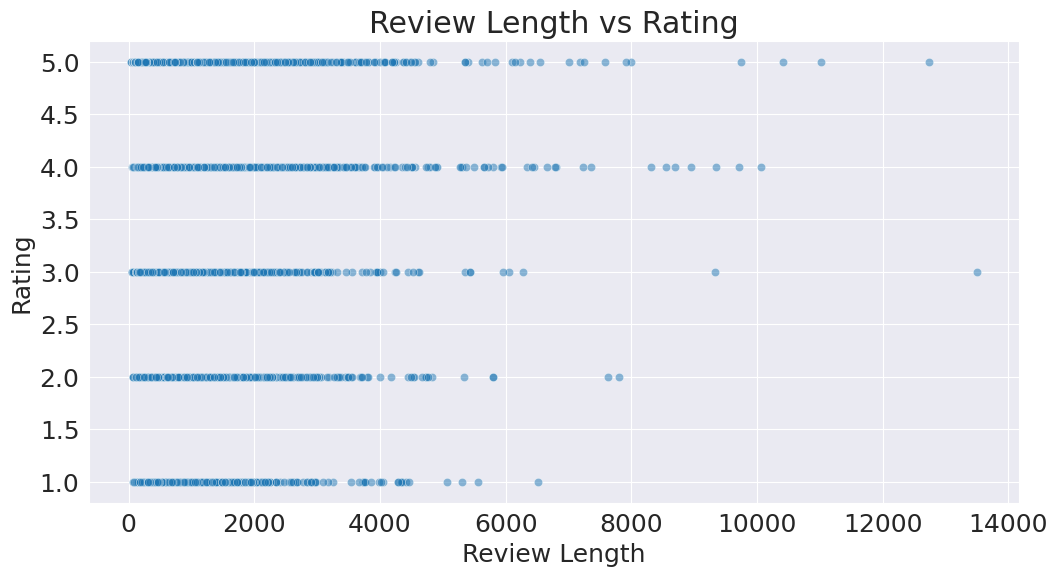

Correlation between review length and rating:
           Length    Rating
Length  1.000000 -0.080565
Rating -0.080565  1.000000


In [23]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Length', y='Rating', data=data, alpha=0.5)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()


correlation = data[['Length', 'Rating']].corr()
print("Correlation between review length and rating:\n", correlation)


**Analyze Reviews with High and Low Ratings:**

Compare reviews with the highest and lowest ratings to see if there are distinct differences.

In [24]:

high_rating_reviews = data[data['Rating'] == 5]['Review'].sample(5, random_state=42)
low_rating_reviews = data[data['Rating'] == 1]['Review'].sample(5, random_state=42)

print("Sample reviews with the highest ratings:\n", high_rating_reviews)
print("\nSample reviews with the lowest ratings:\n", low_rating_reviews)


Sample reviews with the highest ratings:
 7785     beautiful hotel n't know happened poor couple ...
4365     finest hotel experience fiance decided celebra...
16844    budget hotel high end quality learned quickly ...
10507    loved just spent week seven bridges nov 28 dec...
9963     loved du cadran, great time hotel du cadran, s...
Name: Review, dtype: object

Sample reviews with the lowest ratings:
 453      old rude blah reason stayed jacuzzi suite, wis...
3128     hated, just got punta cana stayed melia caribe...
8606     absolutely horrible stayed 30th august jolly c...
12778    problems way stayed 2 nights, property not bad...
4072     tourists stay away bad address unless want roc...
Name: Review, dtype: object


**Bi-gram:**

A bi-gram is a sequence of two adjacent words in a text document. By considering bi-grams, we capture the relationship between pairs of words and identify patterns that may not be apparent when analyzing individual words alone. For example, in the sentence "The quick brown fox jumps over the lazy dog," the bi-grams would be "The quick", "quick brown", "brown fox", "fox jumps", "jumps over", "over the", "the lazy", and "lazy dog."

In [25]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Review'])

In [26]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

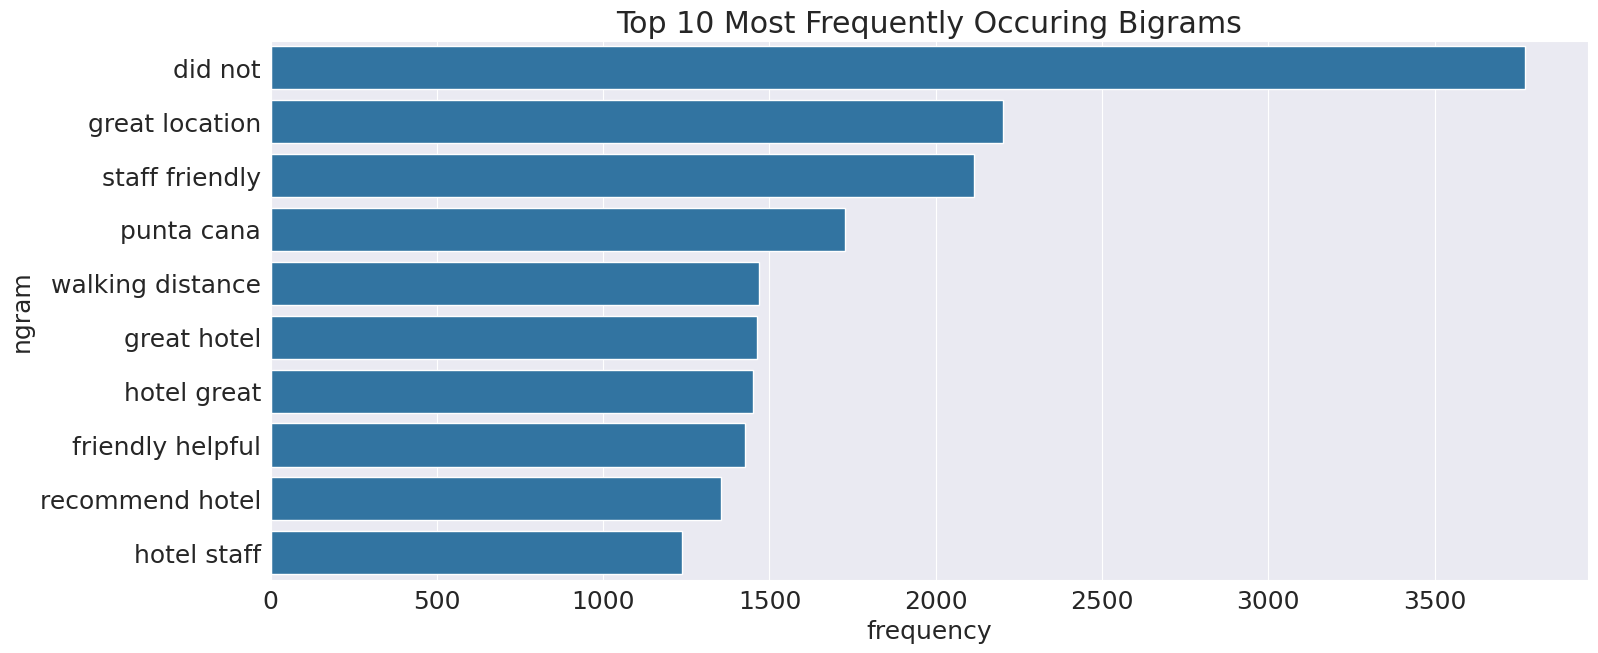

In [27]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

**Tri-gram:**

A tri-gram is a sequence of three adjacent words in a text document. Similar to bi-grams, tri-grams capture the relationship between triplets of words and provide deeper context and understanding of the text. For example, in the same sentence "The quick brown fox jumps over the lazy dog," the tri-grams would be "The quick brown", "quick brown fox", "brown fox jumps", "fox jumps over", "jumps over the", "over the lazy", and "the lazy dog."

In [28]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(data['Review'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

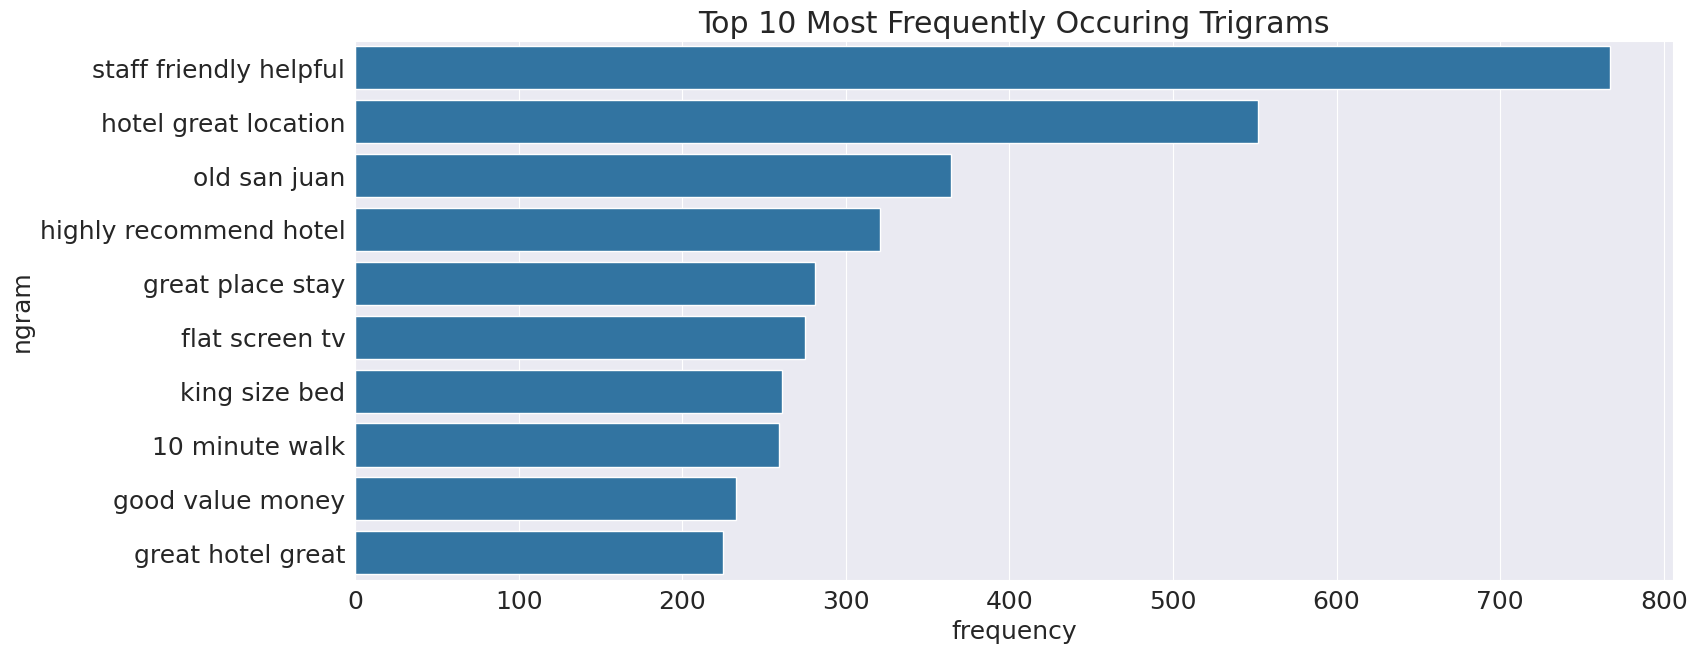

In [29]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

In [49]:

# Step 1: Train Word2Vec model
word2vec_model = Word2Vec(sentences=data['Cleaned_Review'], vector_size=100, window=5, min_count=1, workers=4)

In [51]:
# Step 2: Feature Extraction
def get_average_embedding(review_tokens):
    embeddings = []
    for token in review_tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if embeddings:
        return sum(embeddings) / len(embeddings)
    else:
        return [0] * 100  # Return zero vector if no embeddings found

data['Word2Vec_Embedding'] = data['Cleaned_Review'].apply(get_average_embedding)

In [62]:
data.head()

,Review,Rating,Length,Sentiment,Cleaned_Review,Input,Label,Word2Vec_Embedding
0,nice hotel expensive parking got good deal sta...,4,593,positive,nice hotel expensive parking got good deal sta...,"[input_ids, attention_mask]",2,"[-0.076029725, 0.05701892, 0.041812234, 0.1923..."
1,ok nothing special charge diamond member hilto...,2,1689,negative,ok nothing special charge diamond member hilto...,"[input_ids, attention_mask]",0,"[-0.06732552, 0.057310876, 0.035287883, 0.1765..."
2,nice rooms not 4* experience hotel monaco seat...,3,1427,neutral,nice rooms experience hotel monaco seattle goo...,"[input_ids, attention_mask]",1,"[-0.06409929, 0.05524292, 0.05041929, 0.178634..."
3,"unique, great stay, wonderful time hotel monac...",5,600,positive,unique great stay wonderful time hotel monaco ...,"[input_ids, attention_mask]",2,"[-0.06792099, 0.06374161, 0.017505214, 0.18807..."
4,"great stay great stay, went seahawk game aweso...",5,1281,positive,great stay great stay went seahawk game awesom...,"[input_ids, attention_mask]",2,"[-0.0616615, 0.052929632, 0.0389695, 0.1797037..."


In [52]:
  # Step 3: Model Training
X = pd.DataFrame(data['Word2Vec_Embedding'].tolist())
y = data['Sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
# Step 4: Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7433520370822152


In [58]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Label encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train_encoded)

# Step 4: Evaluation
y_pred_encoded = model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7514027811661381


In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Train AdaBoost model with DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7435959990241522


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7538424005855087


In [64]:
from sklearn.ensemble import RandomForestClassifier


# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.751158819224201


In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Evaluation
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Test Accuracy:", accuracy_knn)


KNN Test Accuracy: 0.6994388875335448


In [66]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Evaluation
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Test Accuracy:", accuracy_nb)


Naive Bayes Test Accuracy: 0.573554525494023


In [67]:
from sklearn.svm import SVC

# Train SVM model
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

# Evaluation
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy:", accuracy_svm)


SVM Test Accuracy: 0.7421322273725299


In [69]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load your data into a DataFrame named 'data'
# Replace 'Cleaned_Review' and 'Sentiment' with your actual column names
# data = pd.read_csv("your_data.csv")

# Step 1: Train Word2Vec model
word2vec_model = Word2Vec(sentences=data['Cleaned_Review'], vector_size=100, window=5, min_count=1, workers=4)

# Step 2: Convert text to sequences of word indices
max_length = 100  # Max sequence length
word_index = {word: idx + 1 for idx, word in enumerate(word2vec_model.wv.index_to_key)}

def text_to_indices(text):
    indices = [word_index.get(word, 0) for word in text][:max_length]
    return indices

X = data['Cleaned_Review'].apply(text_to_indices)
X = pad_sequences(X, maxlen=max_length)

# Step 3: Split the data into train and test sets
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Convert target labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 5: Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes: negative, neutral, positive
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Train the LSTM model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", accuracy)


Epoch 1/10
513/513 [==============================] - 181s 343ms/step - loss: 0.7639 - accuracy: 0.7339 - val_loss: 0.7438 - val_accuracy: 0.7421
Epoch 2/10
513/513 [==============================] - 169s 330ms/step - loss: 0.7555 - accuracy: 0.7352 - val_loss: 0.7427 - val_accuracy: 0.7421
Epoch 3/10
513/513 [==============================] - 168s 327ms/step - loss: 0.7532 - accuracy: 0.7352 - val_loss: 0.7359 - val_accuracy: 0.7421
Epoch 4/10
513/513 [==============================] - 168s 327ms/step - loss: 0.7536 - accuracy: 0.7344 - val_loss: 0.7441 - val_accuracy: 0.7421
Epoch 5/10
513/513 [==============================] - 169s 329ms/step - loss: 0.7518 - accuracy: 0.7352 - val_loss: 0.7425 - val_accuracy: 0.7421
Epoch 6/10
513/513 [==============================] - 170s 332ms/step - loss: 0.7546 - accuracy: 0.7346 - val_loss: 0.7493 - val_accuracy: 0.7421
Epoch 7/10
513/513 [==============================] - 167s 326ms/step - loss: 0.7540 - accuracy: 0.7352 - val_loss: 0.7428 -

In [74]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Test Accuracy: 0.7792144425469627

Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.34      0.44       625
     neutral       0.48      0.07      0.12       432
    positive       0.80      0.97      0.88      3042

    accuracy                           0.78      4099
   macro avg       0.63      0.46      0.48      4099
weighted avg       0.74      0.78      0.73      4099


Confusion Matrix:
[[ 210   20  395]
 [  54   29  349]
 [  75   12 2955]]


In [80]:
import pickle
# Save the trained model, Word2Vec model, and label encoder
with open('xgboost_word2vec_model.pkl', 'wb') as f:
    pickle.dump(model, f)

word2vec_model.save('word2vec_model.model')
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Optionally save the test data for evaluation in the Streamlit app
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)